Page View Time Series Visualizer
For this project you will visualize time series data using a line chart, bar chart, and box plots. You will use Pandas, Matplotlib, and Seaborn to visualize a dataset containing the number of page views each day on the freeCodeCamp.org forum from 2016-05-09 to 2019-12-03. The data visualizations will help you understand the patterns in visits and identify yearly and monthly growth.

Use the data to complete the following tasks:

Use Pandas to import the data from "fcc-forum-pageviews.csv". Set the index to the date column.
Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.
Create a draw_line_plot function that uses Matplotlib to draw a line chart similar to "examples/Figure_1.png". The title should be Daily freeCodeCamp Forum Page Views 5/2016-12/2019. The label on the x axis should be Date and the label on the y axis should be Page Views.
Create a draw_bar_plot function that draws a bar chart similar to "examples/Figure_2.png". It should show average daily page views for each month grouped by year. The legend should show month labels and have a title of Months. On the chart, the label on the x axis should be Years and the label on the y axis should be Average Page Views.
Create a draw_box_plot function that uses Seaborn to draw two adjacent box plots similar to "examples/Figure_3.png". These box plots should show how the values are distributed within a given year or month and how it compares over time. The title of the first chart should be Year-wise Box Plot (Trend) and the title of the second chart should be Month-wise Box Plot (Seasonality). Make sure the month labels on bottom start at Jan and the x and y axis are labeled correctly. The boilerplate includes commands to prepare the data.
For each chart, make sure to use a copy of the data frame.

The boilerplate also includes commands to save and return the image.

Development
Write your code in time_series_visualizer.py. For development, you can use main.py to test your code.

Testing
The unit tests for this project are in test_module.py. We imported the tests from test_module.py to main.py for your convenience.

Submitting
Copy your project's URL and submit it to freeCodeCamp.

In [9]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
df = pd.read_csv('fcc-forum-pageviews.csv',parse_dates=['date'], index_col='date')
df

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933
...,...
2019-11-29,171584
2019-11-30,141161
2019-12-01,142918


In [18]:
low = df['value'].quantile(0.025)
high = df['value'].quantile(0.975)

df = df[(df['value'] >= low) & (df['value'] <=high)]
df

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


In [20]:
def draw_line_plot():
    fig, ax=plt.subplots(figsize=(15,5))
    ax.plot(df.index,df['value'], color='red', linewidth=1)

    #Customizations
    ax.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
    ax.set_xlabel('Date')
    ax.set_ylabel('Page Views')

    return fig

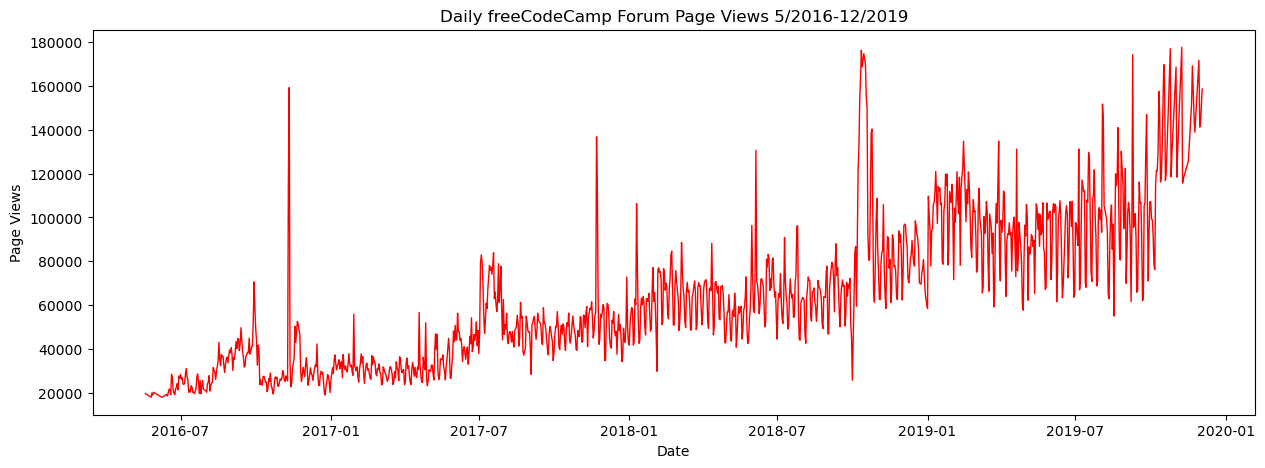

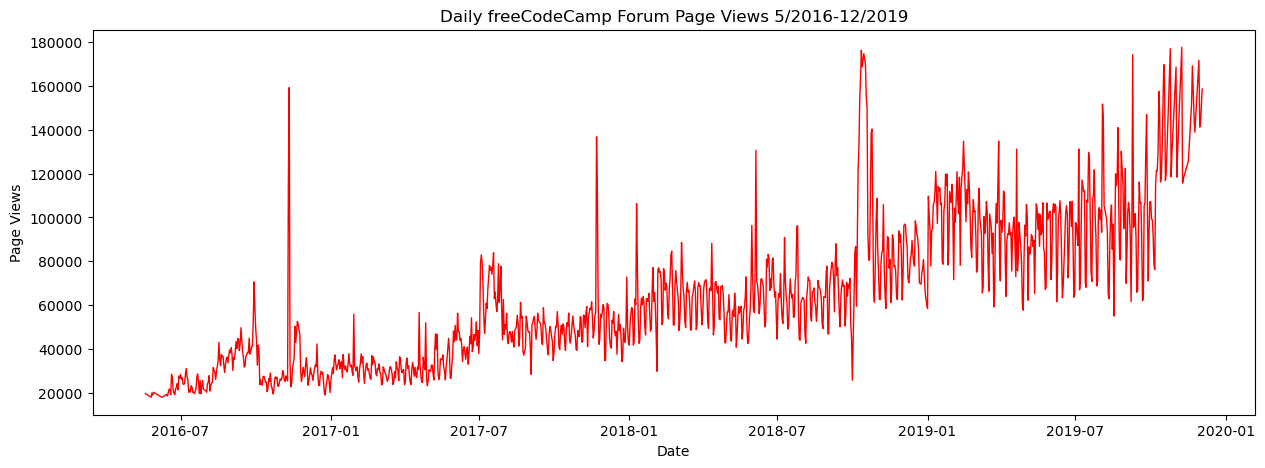

In [22]:
draw_line_plot()

In [24]:
#Bar plot
def draw_bar_plot():
    df_bar = df.copy()
    df_bar['year'] = df_bar.index.year
    df_bar['month'] = df_bar.index.month_name()

    #Grouping and pivot
    df_grouped = df_bar.groupby(['year','month'])['value'].mean().unstack()

    months_order = ['January','February','March','April','May','June','July','August',
                    'September','October','November','December']
    df_grouped = df_grouped[months_order]

    #plot
    fig = df_grouped.plot(kind='bar', figsize=(15,10)).figure
    plt.xlabel('Years')
    plt.ylabel('Average Page Views')
    plt.legend(title='Months')
    plt.tight_layout()

    return fig

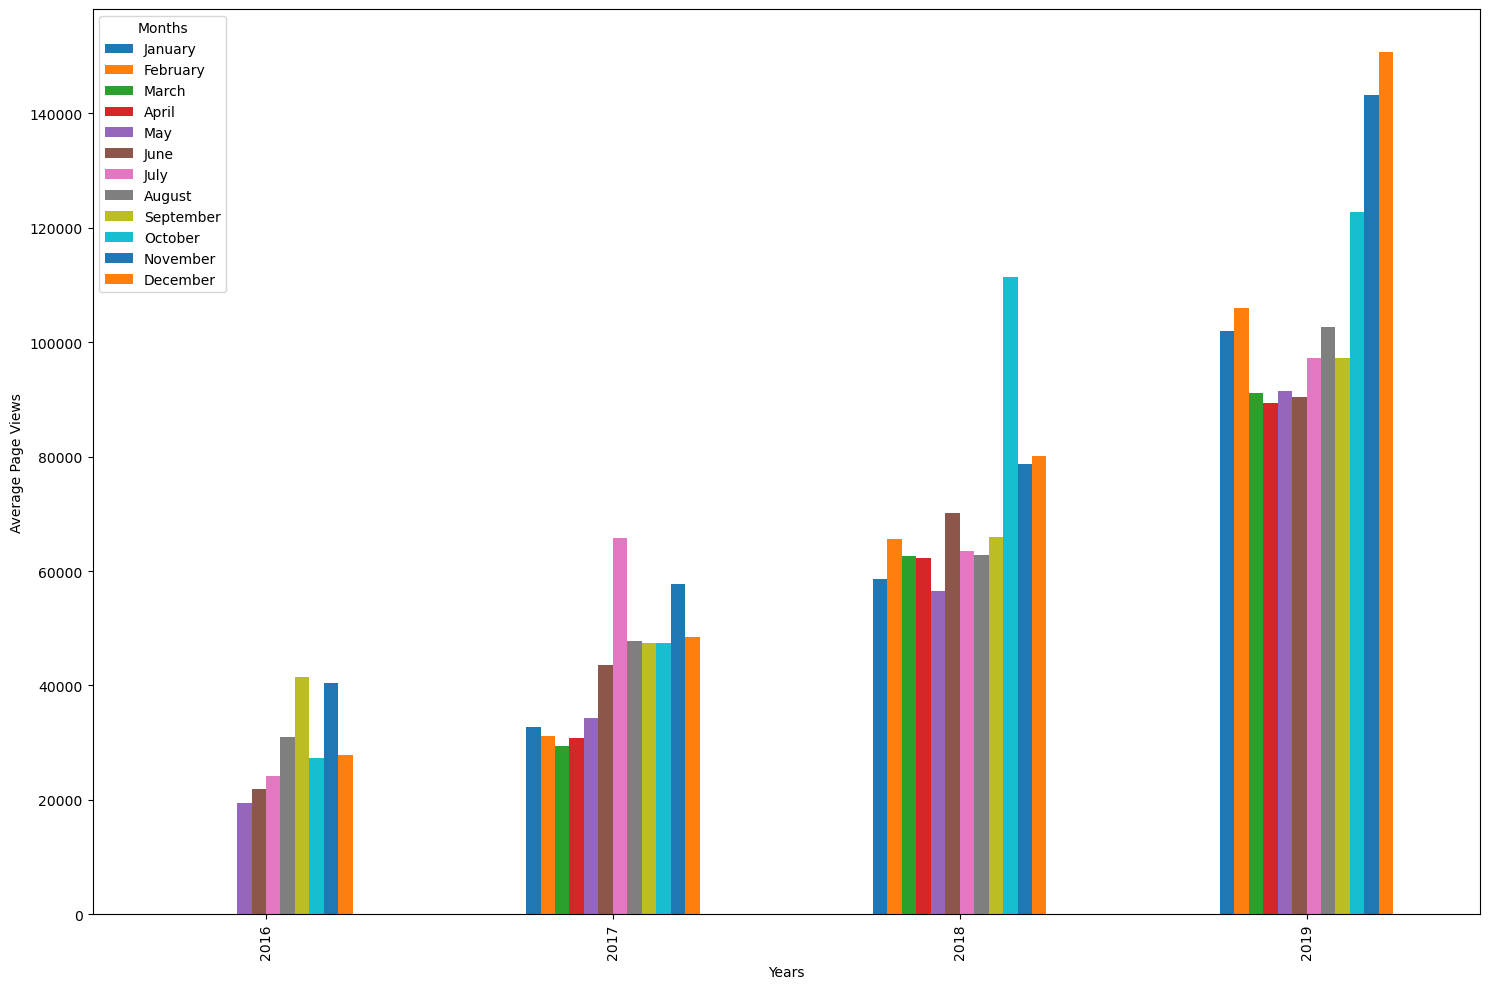

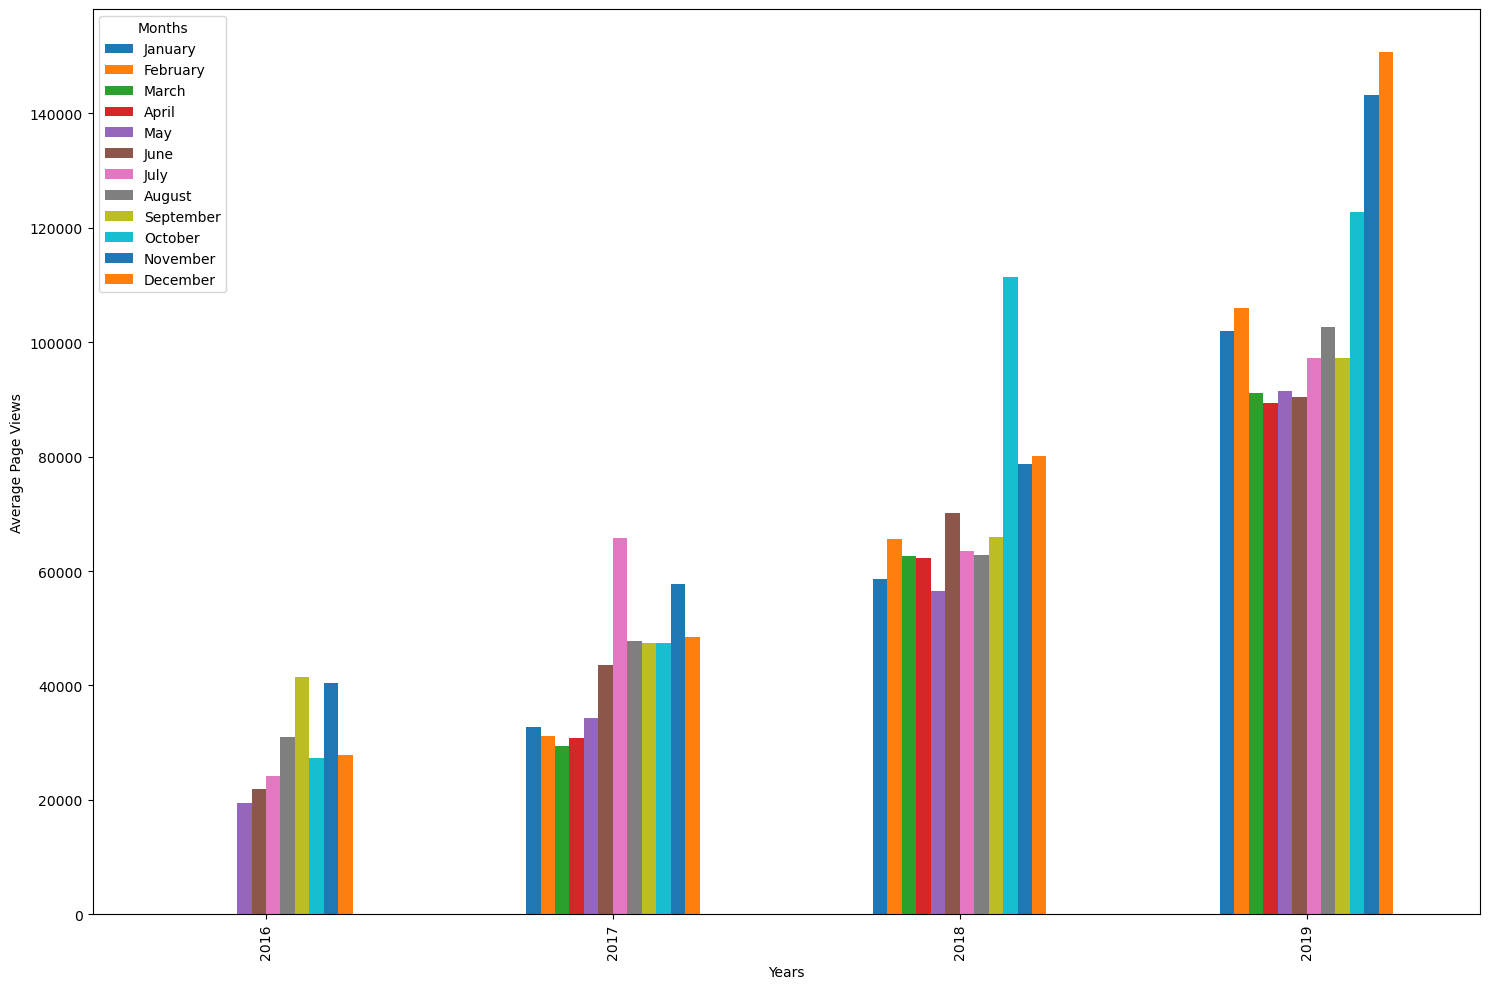

In [26]:
draw_bar_plot()

In [28]:
def draw_box_plot():
    #prepare the data
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box['year'] = df_box['date'].dt.year
    df_box['month'] = df_box['date'].dt.strftime('%b')
    df_box['month_num'] = df_box['date'].dt.month

    df_box = df_box.sort_values('month_num')

    fig, axes = plt.subplots(1,2,figsize=(18,6))

    sns.boxplot(x='year',y='value',data=df_box, ax=axes[0])
    axes[0].set_title('Year-wise box plot (trend)')
    axes[0].set_xlabel('year')
    axes[0].set_ylabel('Page Views')

    sns.boxplot(x='month',y='value',data=df_box,ax=axes[1])
    axes[1].set_title('Month-wise box plot (trend)')
    axes[1].set_xlabel('month')
    axes[1].set_ylabel('Page Views')

    return fig

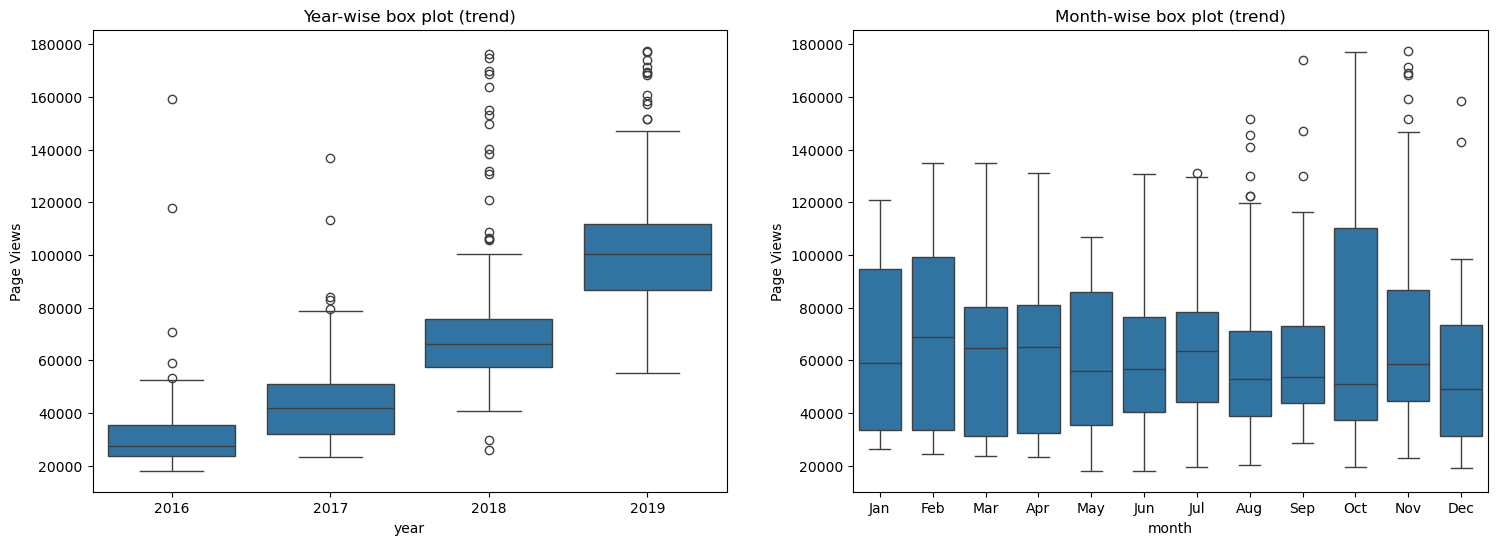

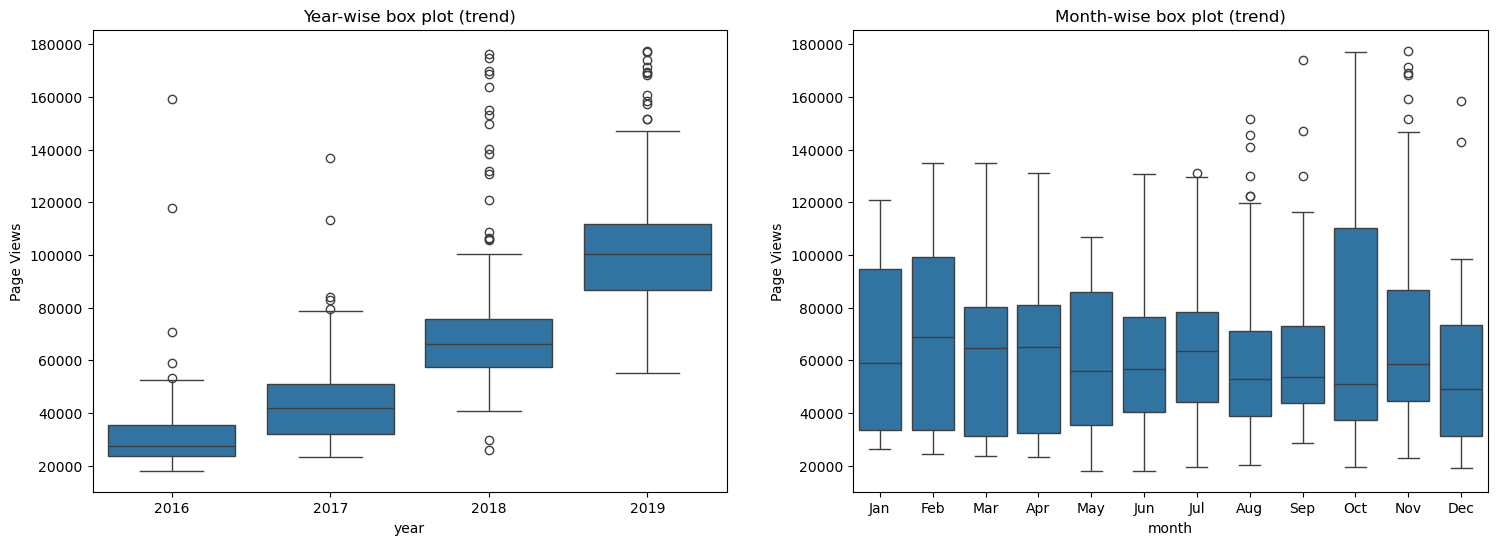

In [30]:
draw_box_plot()